In [3]:
# The code provided is already comprehensive and well-structured. 
# Since this is a new cell at index 0, it will overwrite any existing content in the notebook at that position.
# Ensure that the cell is executed to initialize all variables and imports for subsequent cells.

In [ ]:
# notebook: notebooks/carbon_price_modeling.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Diretórios
os.makedirs("results/figures", exist_ok=True)

# Carregar dataset consolidado
df = pd.read_csv('data/generated/carbon_dataset_consolidated.csv')

display(df.head())

,year,total_ghg,shape_Area,gdp,carbon_price_usd
0,2008,2555.072,2.153218e+09,1585905100000,7.0
1,2009,2374.529,4.078975e+09,1583910000000,7.0
2,2010,2354.155,5.989837e+09,1703150200000,7.0
3,2011,2331.277,6.111267e+09,1770840700000,7.0
4,2012,2432.073,3.479992e+09,1804861600000,7.0


# Separar variáveis de entrada e saída e Padronizar X

In [5]:
X = df[['total_ghg', 'shape_Area', 'gdp']]
y = df['carbon_price_usd']

# Padronizar X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Treino/teste split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelos para testar

In [6]:
modelos = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'MLP Regressor': MLPRegressor(max_iter=1000, random_state=42),
    'Lasso': Lasso(alpha=0.01, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'XGBoost': XGBRegressor(random_state=42)
}

# Treinamento e avaliação

In [7]:
resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    resultados[nome] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

p:\ProjectsPython\trabalho_Felipe_CO2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
p:\ProjectsPython\trabalho_Felipe_CO2\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


# Visualizar resultados

,MSE,R2
Linear Regression,0.000000,1.0
Random Forest,0.000000,1.0
Lasso,0.000000,1.0
SVR,0.000000,1.0
XGBoost,0.000000,1.0
MLP Regressor,1.107148,0.0


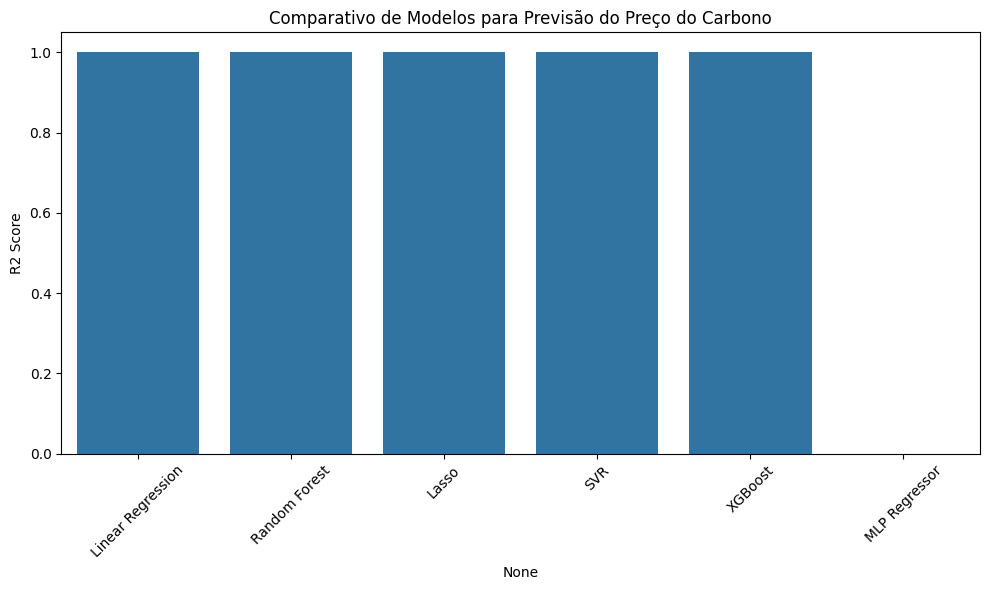

In [8]:
result_df = pd.DataFrame(resultados).T.sort_values(by='R2', ascending=False)
display(result_df)

# Gráfico comparativo
plt.figure(figsize=(10, 6))
sns.barplot(x=result_df.index, y=result_df['R2'])
plt.xticks(rotation=45)
plt.ylabel('R2 Score')
plt.title('Comparativo de Modelos para Previsão do Preço do Carbono')
plt.tight_layout()
plt.savefig('results/figures/comparativo_modelos_r2.png')
plt.show()

# Gráficos de Dispersão: Real vs. Previsto

In [9]:

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Real")
    plt.ylabel("Previsto")
    plt.title(f"Real vs Previsto - {nome}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.tight_layout()
    plt.savefig(f"results/figures/scatter_real_vs_pred_{nome.replace(' ', '_').lower()}.png")
    plt.close()


p:\ProjectsPython\trabalho_Felipe_CO2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
p:\ProjectsPython\trabalho_Felipe_CO2\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


# Exportar Notebook como HTML

In [10]:

# Exportar notebook para HTML
!jupyter nbconvert --to html notebooks/carbon_price_modeling.ipynb --output results/carbon_price_modeling_report.html


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'notebooks/carbon_price_modeling.ipynb' matched no files
